In [1]:
import sys
sys.path.insert(0, '/home/cameron/Projects/hypso-package/hypso/')

import matplotlib.pyplot as plt
from hypso import Hypso1, Hypso2
import os

dir_path = '/home/cameron/Nedlastinger'

In [2]:
h1_l1a_nc_file = os.path.join(dir_path, 'mvco_2025-01-13T14-57-34Z-l1a.nc')
h1_points_file = 'mvco_2025-01-13T14-57-34Z-l1a.points'

h2_l1a_nc_file = os.path.join(dir_path, 'mvco_2025-01-08T15-59-40Z-l1a.nc')

#satobj = Hypso1(path=h1_l1a_nc_file, verbose=True)
satobj = Hypso2(path=h2_l1a_nc_file, verbose=True)

#satobj.run_indirect_georeferencing(points_file_path=points_file)

[INFO] Loading L1a capture mvco_2025-01-08T15-59-40Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide


In [3]:
satobj.generate_l1b_cube()

[INFO] Running calibration routines...
[INFO] Running radiometric calibration...
[INFO] Running spectral correction...


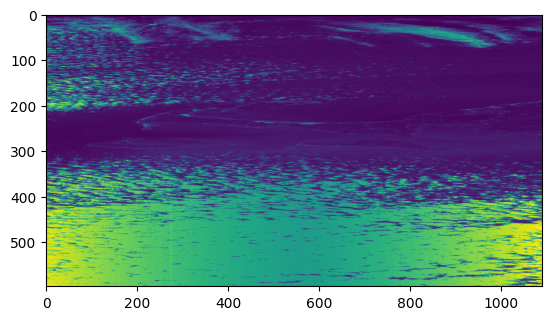

In [5]:
plt.imshow(satobj.l1b_cube[:,:,40])

In [5]:
satobj.capture_type

'wide'

In [6]:
satobj.rad_coeff_file

PosixPath('/home/cameron/Nedlastinger/.venv/lib/python3.12/site-packages/hypso2_calibration/data/h2_radiometric_calibration_matrix_wide.npz')

In [7]:
from hypso.calibration import read_coeffs_from_file

In [8]:
read_coeffs_from_file(satobj.rad_coeff_file)

ValueError: [ERROR] Could not read coefficients file.

In [9]:
print(satobj.rad_coeff_file)

/home/cameron/Nedlastinger/.venv/lib/python3.12/site-packages/hypso2_calibration/data/h2_radiometric_calibration_matrix_wide.npz


In [11]:
import numpy as np

read_coeffs_from_file(satobj.rad_coeff_file)


def read_coeffs_from_file(coeff_path: str) -> np.ndarray:

    coefficients = None

    # Processing should be Float 32
    if coeff_path.suffix == ".npz":
        coefficients = np.load(coeff_path)
        key = list(coefficients.keys())[0]
        coefficients = coefficients[key]

    elif coeff_path.suffix == ".csv":
        coefficients = np.genfromtxt(coeff_path, delimiter=',', dtype="float64")
    else:
        coefficients = None


    return coefficients

ValueError: [ERROR] Could not read coefficients file.

In [3]:
satobj.run_direct_georeferencing()

[INFO] Running direct georeferencing...
[INFO] ADCS samples: 430
[INFO] ADCS time range: 1736779560.000000 to 1736780520.000000
[INFO] Frame time range: 1736780254.249422 to 1736780303.999422
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry computations...
[INFO] Using UTM map: WGS 84 / UTM zone 19N EPSG: 32619
[INFO] Track geometry computations done.
[INFO] Running angles geometry computations...
[INFO] Computing local angles (sun and satellite azimuth and zenith angles) ...
[INFO] Using astropy on a subsampling of pixels ... (TODO skyfield may be faster)
[INFO] Interpolating the rest of the pixels ...
[INFO] Computing local angles done
[INFO] Angles geometry computations done.


In [4]:
satobj.run_indirect_georeferencing(points_file_path=points_file)

[INFO] Running indirect georeferencing...
No image mode provided. Detected image mode: bin3
[INFO] Running track geometry computations...
[INFO] Using UTM map: WGS 84 / UTM zone 19N EPSG: 32619
[INFO] Track geometry computations done.
[INFO] Running angles geometry computations...
[INFO] Computing local angles (sun and satellite azimuth and zenith angles) ...
[INFO] Using astropy on a subsampling of pixels ... (TODO skyfield may be faster)
[INFO] Interpolating the rest of the pixels ...
[INFO] Computing local angles done
[INFO] Angles geometry computations done.


In [5]:
from hypso.geometry_definition import generate_area_def

satobj.bbox

(-71.38236292748121, 39.82185541946312, -69.76252811919608, 43.08225129043765)

In [1]:
satobj.rad_coeff_file

NameError: name 'satobj' is not defined

In [6]:
bbox = (-71.5, 39.8, -69, 43.1)

In [7]:
area = generate_area_def(area_id = 'test',
                      proj_id = 'test',
                      description = 'test',
                      bbox = bbox,
                      height = 512,
                      width = 512
                      )

In [8]:
area

Area ID: test
Description: test
Projection ID: test
Projection: {'ellps': 'bessel', 'lat_0': '90', 'lat_ts': '41.45', 'lon_0': '-70.25', 'no_defs': 'None', 'proj': 'stere', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 512
Number of rows: 512
Area extent: (-108452.5312, -4970309.1364, 100457.2277, -4603889.5646)

In [10]:
from hypso.resample import resample_dataarray_bilinear, resample_dataarray_kd_tree_nearest

In [11]:
output = resample_dataarray_bilinear(area_def = area, 
                        data = satobj.l1a_cube,
                        latitudes = satobj.latitudes,
                        longitudes = satobj.longitudes,
                        )

/home/cameron/Nedlastinger/.venv/lib/python3.12/site-packages/pyproj/crs/crs.py:1295: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


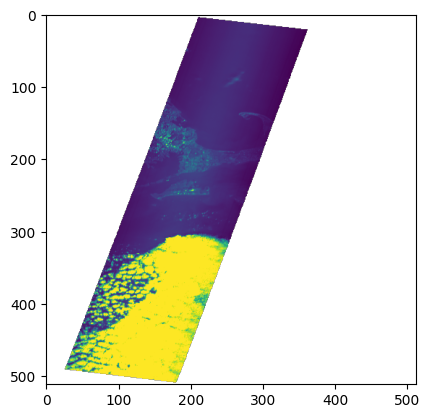

In [27]:
plt.imshow(output[:,:,40])

In [22]:
satobj.resolution

np.float64(598.2078451231815)

In [21]:
output = resample_dataarray_kd_tree_nearest(area_def = area, 
                        data = satobj.l1a_cube,
                        latitudes = satobj.latitudes,
                        longitudes = satobj.longitudes,
                        radius_of_influence=satobj.resolution)

/home/cameron/Projects/hypso-package/hypso/resampling/resample.py:105: PerformanceWarning: KDTreeNearestXarrayResampler uses a dask-based implementation, but a pure numpy array was provided. Data will be converted to dask arrays for computation and then converted back. To avoid this warning convert your numpy array before providing it to the resampler.
  resampled_data[:,:,band] = kdtn.resample(data=data[:,:,band], fill_value=np.nan, radius_of_influence=radius_of_influence)


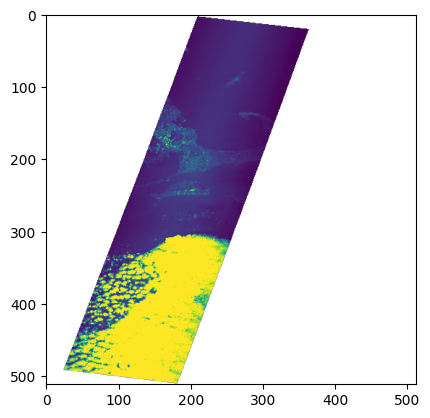

In [23]:
plt.imshow(output[:,:,40])

In [20]:
output_band_40 = _resample_dataarray(area_def = area, 
                        data = band_40,
                        latitudes = satobj.latitudes,
                        longitudes = satobj.longitudes)

/home/cameron/Nedlastinger/.venv/lib/python3.12/site-packages/pyproj/crs/crs.py:1295: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/cameron/Nedlastinger/.venv/lib/python3.12/site-packages/pyproj/crs/crs.py:1295: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [24]:
import xarray as xr
import numpy as np
from pyresample.geometry import SwathDefinition
from pyresample.geometry import SwathDefinition, AreaDefinition
from pyresample.bilinear.xarr import XArrayBilinearResampler 
from pyresample.future.resamplers.nearest import KDTreeNearestXarrayResampler

latitudes_xr = xr.DataArray(satobj.latitudes_indirect, dims=satobj.dim_names_2d)
longitudes_xr = xr.DataArray(satobj.longitudes_indirect, dims=satobj.dim_names_2d)
dst_swath_def = SwathDefinition(lons=longitudes_xr, lats=latitudes_xr)

latitudes_xr = xr.DataArray(satobj.latitudes, dims=satobj.dim_names_2d)
longitudes_xr = xr.DataArray(satobj.longitudes, dims=satobj.dim_names_2d)
src_swath_def = SwathDefinition(lons=longitudes_xr, lats=latitudes_xr)

data = satobj.l1a_cube

#brs = XArrayBilinearResampler(source_geo_def=src_swath_def, target_geo_def=dst_swath_def, radius_of_influence=50000)
brs = KDTreeNearestXarrayResampler(source_geo_def=src_swath_def, target_geo_def=dst_swath_def)

num_bands = data.shape[2]

resampled_data = np.zeros((dst_swath_def.shape[0], dst_swath_def.shape[1], num_bands))
resampled_data = xr.DataArray(resampled_data, dims=satobj.dim_names_3d)
resampled_data.attrs.update(data.attrs)

for band in range(0,num_bands):
    
    # Resample using pre-computed resampling LUTs
    #resampled_data[:,:,band] = brs.get_sample_from_bil_info(data=data[:,:,band], 
    #                                                        fill_value=np.nan, 
    #                                                        output_shape=dst_swath_def.shape)

    resampled_data[:,:,band] = brs.resample(data=data[:,:,band], fill_value=np.nan)

/tmp/ipykernel_6125/3917326907.py:34: PerformanceWarning: KDTreeNearestXarrayResampler uses a dask-based implementation, but a pure numpy array was provided. Data will be converted to dask arrays for computation and then converted back. To avoid this warning convert your numpy array before providing it to the resampler.
  resampled_data[:,:,band] = brs.resample(data=data[:,:,band], fill_value=np.nan)
/tmp/ipykernel_6125/3917326907.py:34: PerformanceWarning: KDTreeNearestXarrayResampler uses a dask-based implementation, but a pure numpy array was provided. Data will be converted to dask arrays for computation and then converted back. To avoid this warning convert your numpy array before providing it to the resampler.
  resampled_data[:,:,band] = brs.resample(data=data[:,:,band], fill_value=np.nan)


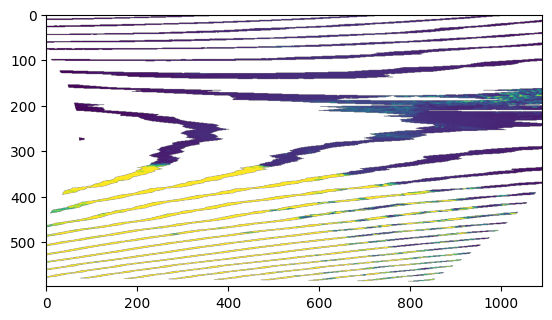

In [26]:
plt.imshow(resampled_data[:,:,40])

In [ ]:



#brs = KDTreeNearestXarrayResampler(source_geo_def=swath_def, target_geo_def=area_def)


# Calculate bilinear neighbour info and generate pre-computed resampling LUTs
brs.get_bil_info()

if data.ndim == 2:
    resampled_data = brs.resample(data=data[:,:], fill_value=np.nan)

elif data.ndim == 3:

    num_bands = data.shape[2]

    resampled_data = np.zeros((area_def.shape[0], area_def.shape[1], num_bands))
    resampled_data = xr.DataArray(resampled_data, dims=dims_3d)
    resampled_data.attrs.update(data.attrs)

    for band in range(0,num_bands):
        
        # Resample using pre-computed resampling LUTs
        resampled_data[:,:,band] = brs.get_sample_from_bil_info(data=data[:,:,band], 
                                                                fill_value=np.nan, 
                                                                output_shape=area_def.shape)

        #resampled_data[:,:,band] = brs.resample(data=data[:,:,band], fill_value=np.nan)

else:
    return None

In [46]:
import xarray as xr
import numpy as np
from pyresample.geometry import SwathDefinition
from pyresample.geometry import SwathDefinition, AreaDefinition
from pyresample.bilinear.xarr import XArrayBilinearResampler 
from pyresample.future.resamplers.nearest import KDTreeNearestXarrayResampler

latitudes_xr = xr.DataArray(satobj.latitudes_indirect, dims=satobj.dim_names_2d)
longitudes_xr = xr.DataArray(satobj.longitudes_indirect, dims=satobj.dim_names_2d)
dst_swath_def = SwathDefinition(lons=longitudes_xr, lats=latitudes_xr)

latitudes_xr = xr.DataArray(satobj.latitudes, dims=satobj.dim_names_2d)
longitudes_xr = xr.DataArray(satobj.longitudes, dims=satobj.dim_names_2d)
src_swath_def = SwathDefinition(lons=longitudes_xr, lats=latitudes_xr)

data = satobj.l1a_cube[:,:,40]


brs = KDTreeNearestXarrayResampler(source_geo_def=dst_swath_def, target_geo_def=src_swath_def)

#resampled_data = np.zeros((dst_swath_def.shape[0], dst_swath_def.shape[1], num_bands))
#resampled_data = xr.DataArray(resampled_data, dims=satobj.dim_names_3d)
#resampled_data.attrs.update(data.attrs)


resampled_data = brs.resample(data=data, fill_value=np.nan, radius_of_influence=satobj.resolution)

/tmp/ipykernel_6125/3530838636.py:26: PerformanceWarning: KDTreeNearestXarrayResampler uses a dask-based implementation, but a pure numpy array was provided. Data will be converted to dask arrays for computation and then converted back. To avoid this warning convert your numpy array before providing it to the resampler.
  resampled_data = brs.resample(data=data, fill_value=np.nan, radius_of_influence=satobj.resolution)


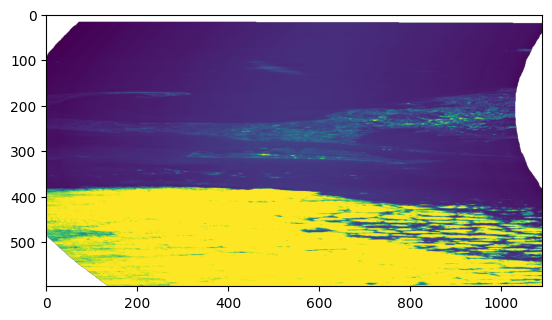

In [47]:
plt.imshow(resampled_data)

In [7]:
satobj.latitudes

array([[42.96837411, 42.9684772 , 42.96858029, ..., 43.08203985,
        43.08214557, 43.08225129],
       [42.96306266, 42.96316574, 42.96326882, ..., 43.07672053,
        43.07682624, 43.07693196],
       [42.95775136, 42.95785443, 42.9579575 , ..., 43.07140141,
        43.07150712, 43.07161283],
       ...,
       [39.83250765, 39.83260716, 39.83270667, ..., 39.9424211 ,
        39.94252352, 39.94262594],
       [39.82718148, 39.82728098, 39.82738048, ..., 39.93708492,
        39.93718733, 39.93728974],
       [39.82185542, 39.82195491, 39.8220544 , ..., 39.93174887,
        39.93185127, 39.93195367]], shape=(598, 1092))

In [5]:
satobj.generate_l1d_cube()

[INFO] Running calibration routines...
[INFO] Running radiometric calibration...
[INFO] Running smile correction...
[INFO] Running destriping correction...
[INFO] Running direct georeferencing...
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry computations...
[INFO] Using UTM map: WGS 84 / UTM zone 19N EPSG: 32619
[INFO] Track geometry computations done.
[INFO] Running angles geometry computations...
[INFO] Computing local angles (sun and satellite azimuth and zenith angles) ...
[INFO] Using astropy on a subsampling of pixels ... (TODO skyfield may be faster)
[INFO] Interpolating the rest of the pixels ...
[INFO] Computing local angles done
[INFO] Angles geometry computations done.


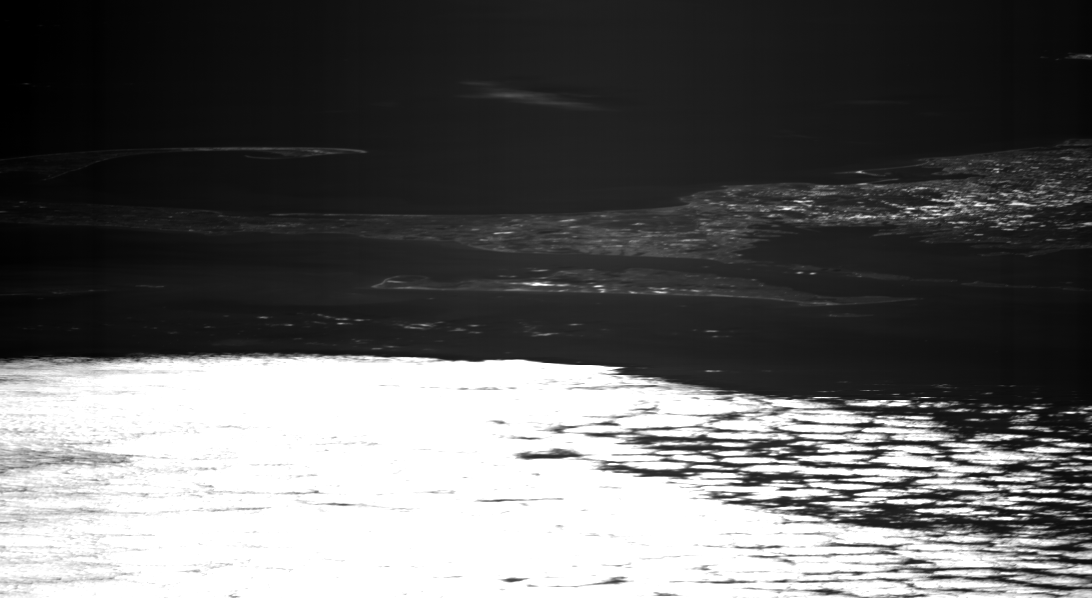

In [6]:
from hypso.satpy import get_l1a_satpy_scene#, get_l1b_satpy_scene, get_l1c_satpy_scene, get_l1d_satpy_scene

scene = get_l1a_satpy_scene(satobj=satobj, use_indirect_georef=False)

scene.show('band_40')

In [3]:
satobj.generate_l1b_cube()

[INFO] Running calibration routines...
[INFO] Running radiometric calibration...
[INFO] Running smile correction...
[INFO] Running destriping correction...


In [6]:
satobj.run_indirect_georeferencing(points_file_path=points_file)

[INFO] Running indirect georeferencing...
No image mode provided. Detected image mode: bin3
[INFO] Running track geometry computations...
[INFO] Using UTM map: WGS 84 / UTM zone 19N EPSG: 32619
[INFO] Track geometry computations done.
[INFO] Running angles geometry computations...
[INFO] Computing local angles (sun and satellite azimuth and zenith angles) ...
[INFO] Using astropy on a subsampling of pixels ... (TODO skyfield may be faster)
[INFO] Interpolating the rest of the pixels ...
[INFO] Computing local angles done
[INFO] Angles geometry computations done.


In [7]:
satobj.generate_l1c_cube()

[INFO] Running calibration routines...
[INFO] Running radiometric calibration...
[INFO] Running smile correction...
[INFO] Running destriping correction...
[INFO] Running direct georeferencing...
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry computations...
[INFO] Using UTM map: WGS 84 / UTM zone 19N EPSG: 32619
[INFO] Track geometry computations done.
[INFO] Running angles geometry computations...
[INFO] Computing local angles (sun and satellite azimuth and zenith angles) ...
[INFO] Using astropy on a subsampling of pixels ... (TODO skyfield may be faster)
[INFO] Interpolating the rest of the pixels ...
[INFO] Computing local angles done
[INFO] Angles geometry computations done.


In [5]:
satobj.generate_l1d_cube()

[INFO] Running calibration routines...
[INFO] Running radiometric calibration...
[INFO] Running smile correction...
[INFO] Running destriping correction...
[INFO] Running direct georeferencing...
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry computations...
[INFO] Using UTM map: WGS 84 / UTM zone 19N EPSG: 32619
[INFO] Track geometry computations done.
[INFO] Running angles geometry computations...
[INFO] Computing local angles (sun and satellite azimuth and zenith angles) ...
[INFO] Using astropy on a subsampling of pixels ... (TODO skyfield may be faster)
[INFO] Interpolating the rest of the pixels ...
[INFO] Computing local angles done
[INFO] Angles geometry computations done.


In [7]:
satobj.write_l1b_nc_file(overwrite=True, datacube=False)

In [13]:
satobj.write_l1c_nc_file(overwrite=True, datacube=False)

In [5]:
satobj.write_l1d_nc_file(overwrite=True, datacube=False)

In [7]:
type(satobj.wavelengths)

numpy.ndarray

In [50]:
satobj.generate_l1b_cube()

[INFO] Running calibration routines...
[INFO] Running radiometric calibration...
[INFO] Running smile correction...
[INFO] Running destriping correction...


In [51]:
from hypso.spectral_analysis import get_closest_wavelength_index

#red_wl = 630
#green_wl = 550
#blue_wl = 480

print(get_closest_wavelength_index(satobj, 630))
print(get_closest_wavelength_index(satobj, 550))
print(get_closest_wavelength_index(satobj, 480))

69
46
26


In [49]:
satobj.wavelengths

range(0, 120)

In [7]:
satobj.dim_names_3d

['y', 'x', 'band']

In [8]:
bbox = (7.584745581174573, 62.373319448779675, 11.32957594182944, 65.5340918021801)

In [10]:
type(bbox[0])

float

In [9]:
type(bbox)

tuple

In [5]:
from hypso.satpy import get_l1a_satpy_scene, get_l1b_satpy_scene, get_l1c_satpy_scene, get_l1d_satpy_scene

scene = get_l1a_satpy_scene(satobj=satobj, )

scene.show('band_40')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (satpy.py, line 51)

In [4]:
# Import Satellite Object
from hypso import Hypso1, Hypso2
import os

# Define HYPSO Image File and the .points from QGIS (if available)
dir_path = '/home/cameron/Nedlastinger'
#l1a_nc_file = os.path.join(dir_path, 'tromso-aurora_2023-03-01T20-26-25Z-l1a.nc')
l1a_nc_file = os.path.join(dir_path, 'mvco_2025-01-13T14-57-34Z-l1a.nc')

points_file = 'mvco_2025-01-13T14-57-34Z-l1a.points'


# Create Satellite Object
#satobj = Hypso1(path=l1a_nc_file, verbose=True)
satobj = Hypso1(path=l1a_nc_file, verbose=True)

#satobj.run_indirect_georeferencing(points_file_path=points_file)

NameError: name 'get_l1a_satpy_scene' is not defined

In [9]:
type(satobj.dim_names_2d)

list

In [12]:
from datetime import datetime

In [15]:
type(satobj.capture_datetime)

datetime.datetime

In [16]:
satobj.l1a_cube

<xarray.DataArray (y: 598, x: 1092, band: 120)> Size: 627MB
array([[[ 252.,  431.,  699., ...,  425.,  472.,  539.],
        [ 254.,  417.,  680., ...,  412.,  474.,  535.],
        [ 261.,  415.,  697., ...,  406.,  485.,  555.],
        ...,
        [ 209.,  331.,  564., ...,  456.,  505.,  554.],
        [ 210.,  339.,  563., ...,  454.,  497.,  552.],
        [ 199.,  338.,  569., ...,  445.,  493.,  558.]],

       [[ 263.,  434.,  701., ...,  425.,  478.,  557.],
        [ 255.,  432.,  708., ...,  429.,  470.,  541.],
        [ 236.,  422.,  705., ...,  425.,  461.,  546.],
        ...,
        [ 218.,  338.,  582., ...,  456.,  493.,  562.],
        [ 213.,  333.,  562., ...,  446.,  498.,  548.],
        [ 205.,  331.,  546., ...,  454.,  497.,  548.]],

       [[ 257.,  411.,  717., ...,  418.,  478.,  549.],
        [ 255.,  416.,  696., ...,  403.,  469.,  538.],
        [ 245.,  426.,  700., ...,  420.,  468.,  524.],
        ...,
...
        [ 426.,  707., 1239., ..., 5855., 5903., 5900.],
        [ 425.,  692., 1205., ..., 6013., 6000., 5984.],
        [ 409.,  689., 1170., ..., 6045., 5947., 6031.]],

       [[ 661., 1168., 2064., ..., 6309., 6394., 6447.],
        [ 663., 1187., 2054., ..., 6290., 6348., 6428.],
        [ 656., 1203., 2088., ..., 6245., 6379., 6342.],
        ...,
        [ 415.,  685., 1206., ..., 5727., 5678., 5698.],
        [ 415.,  693., 1205., ..., 5878., 5781., 5784.],
        [ 405.,  689., 1181., ..., 5918., 5772., 5865.]],

       [[ 659., 1211., 2087., ..., 6580., 6585., 6624.],
        [ 675., 1211., 2118., ..., 6479., 6521., 6549.],
        [ 665., 1211., 2101., ..., 6484., 6527., 6553.],
        ...,
        [ 420.,  711., 1226., ..., 5580., 5544., 5572.],
        [ 439.,  710., 1234., ..., 5724., 5709., 5723.],
        [ 428.,  701., 1203., ..., 5826., 5764., 5823.]]],
      shape=(598, 1092, 120))
Coordinates:
  * y        (y) int64 5kB 0 1 2 3 4 5 6 7 8 ... 590 591 592 593 594 595 596 597
  * x        (x) int64 9kB 0 1 2 3 4 5 6 ... 1085 1086 1087 1088 1089 1090 1091
  * band     (band) int64 960B 0 1 2 3 4 5 6 7 ... 113 114 115 116 117 118 119
Attributes:
    level:        L1a
    units:        counts
    description:  Digital Number (DN)

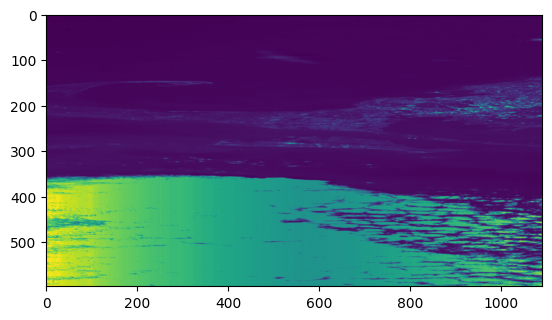

In [11]:
plt.imshow(satobj.l1b_cube[:,:,40])

In [17]:
import netCDF4 as nc

nc_file_path = l1a_nc_file

with nc.Dataset(nc_file_path, format="NETCDF4") as f:
        group = f.groups["metadata"]["capture_config"]
        var = group.variables['file']

        

        #print(group)
        #print(group.variables)
        #print(group.variables['file'])
        #np.array(group.variables["Lt"][:], dtype='double')
        #print(f.ncattrs())
        #print(f.getncattr('instrument'))

        

        print(var[:])
        print(type(var[:]))

flags = 0x00000210
camera_ID = 2
frame_count = 598
exposure = 30
fps = 12
row_count = 1092
column_count = 1080
sample_divisor = 1
bin_factor = 9
aoi_x = 428
aoi_y = 62
gain = 0
temp_log_period_ms = 10000
spatial_subsampling = 1

<class 'str'>


In [22]:
satobj.ncattrs

{'instrument': 'HYPSO-1 Hyperspectral Imager',
 'institution': 'Norwegian University of Science and Technology',
 'resolution': 'N/A',
 'location_description': 'mvco',
 'license': 'TBD',
 'naming_authority': 'NTNU SmallSat Lab',
 'date_processed': '2025-01-29T19:20:32.069527Z',
 'date_aquired': '2025-01-13T14:57:34.123651Z',
 'publisher_name': 'NTNU SmallSat Lab',
 'publisher_url': 'https://hypso.space',
 'processing_level': 'L1A',
 'target_coords': '41.3250 -70.5670',
 'radiometric_file': 'rad_coeffs_FM_full_frame.csv',
 'spectral_file': 'spectral_coeffs_FM_order3.csv',
 'md5sum': '121ee0380e718110d997c15e18ff5d9b',
 'byte_size_compressed_cube': 0,
 'warnings': 'WARNING: Error while loading timestamps.txt; WARNING: Error while loading cube size; WARNING: Buffer name error; WARNING: Downlink time could not be established, WARNING: Database timestamp could not be retrieved; WARNING: Planned time could not be established; WARNING: Database version could not be established; '}

In [23]:
satobj.capture_config

{'flags': '0x00000210',
 'camID': 2,
 'frame_count': 598,
 'exposure': 30,
 'fps': 12,
 'row_count': 1092,
 'column_count': 1080,
 'sample_div': 1,
 'bin_factor': 9,
 'aoi_x': 428,
 'aoi_y': 62,
 'gain': 0,
 'temp_log': 10000,
 'format': 'ini',
 'framerate': 12}

In [24]:
satobj.write_l1b_nc_file()

In [26]:
getattr(satobj, 'capture_config')

{'flags': '0x00000210',
 'camID': 2,
 'frame_count': 598,
 'exposure': 30,
 'fps': 12,
 'row_count': 1092,
 'column_count': 1080,
 'sample_div': 1,
 'bin_factor': 9,
 'aoi_x': 428,
 'aoi_y': 62,
 'gain': 0,
 'temp_log': 10000,
 'format': 'ini',
 'framerate': 12}

In [27]:
getattr(satobj, 'capture_config')['flags']

'0x00000210'

In [28]:
getattr(satobj, 'dimensions')

{'lines': 598,
 'samples': 1092,
 'bands': 120,
 'adcssamples': 430,
 'radrows': 1216,
 'radcols': 1936,
 'specrows': 4}

In [30]:
getattr(satobj, 'adcs')["timestamps"]

masked_array(data=[1.73677956e+09, 1.73677962e+09, 1.73677968e+09,
                   1.73677974e+09, 1.73677980e+09, 1.73677986e+09,
                   1.73677992e+09, 1.73677998e+09, 1.73678004e+09,
                   1.73678008e+09, 1.73678009e+09, 1.73678010e+09,
                   1.73678011e+09, 1.73678012e+09, 1.73678013e+09,
                   1.73678014e+09, 1.73678015e+09, 1.73678016e+09,
                   1.73678017e+09, 1.73678018e+09, 1.73678019e+09,
                   1.73678020e+09, 1.73678021e+09, 1.73678022e+09,
                   1.73678023e+09, 1.73678024e+09, 1.73678025e+09,
                   1.73678025e+09, 1.73678025e+09, 1.73678025e+09,
                   1.73678025e+09, 1.73678025e+09, 1.73678025e+09,
                   1.73678025e+09, 1.73678025e+09, 1.73678025e+09,
                   1.73678025e+09, 1.73678025e+09, 1.73678025e+09,
                   1.73678025e+09, 1.73678025e+09, 1.73678025e+09,
                   1.73678026e+09, 1.73678026e+09, 1.73678026e

In [15]:
from pathlib import Path
import urllib.parse
import urllib.request
from hypso.utils import MyProgressBar
from typing import Union


def download_hypso1_nc_files(filename_list: list, download_dir: Union[str, None] = None) -> None:
    """
    Bulk download HYPSO-1_L1A data from server. NTNU VPN access is required.

    :param filename_list: list of filenames.
        Example: ["tibet_2022-09-29_0446Z.nc", "xaafuun_2023-09-11_0623Z-l1a.nc"]
    :param download_dir: Absolute path to directory to download files

    :return:
    """

    if download_dir is None:
        raise Exception("Please provide download directory path.")

    #server_url = "http://web.hypso.ies.ntnu.no/data/HYPSO-1_L1A/"
    server_url = "http://129.241.2.147:8008/"

    # Create Output Dir
    output_dir = Path(download_dir).absolute()
    output_dir.mkdir(exist_ok=True, parents=True)

    # Download Files
    for f in filename_list:
        dwnld_url = urllib.parse.urljoin(server_url, f)
        output_filename = Path(output_dir, f)
        try:
            urllib.request.urlretrieve(url=dwnld_url,
                                       filename=output_filename,
                                       reporthook=MyProgressBar(f))

        except Exception as err:
            print(f"Download Failed. {err}")
            print(f"Deleting {f}")
            # If fail, delete
            output_filename.unlink(missing_ok=True)
